Epoch 1/50


/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8103 - loss: 0.4868 - val_accuracy: 0.6282 - val_loss: 0.7430
Epoch 2/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8367 - loss: 0.4015 - val_accuracy: 0.8645 - val_loss: 0.3655
Epoch 3/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8440 - loss: 0.3783 - val_accuracy: 0.8673 - val_loss: 0.3429
Epoch 4/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8548 - loss: 0.3599 - val_accuracy: 0.8754 - val_loss: 0.3266
Epoch 5/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8611 - loss: 0.3348 - val_accuracy: 0.8840 - val_loss: 0.3110
Epoch 6/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8633 - loss: 0.3374 - val_accuracy: 0.8883 - val_loss: 0.3075
Epoch 7/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8674 - loss: 0.3224 - val_accuracy: 0.8864 - val_loss: 0.3048
Epoch 8/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8734 - loss: 0.3155 - val_accuracy: 0.8921 - val_

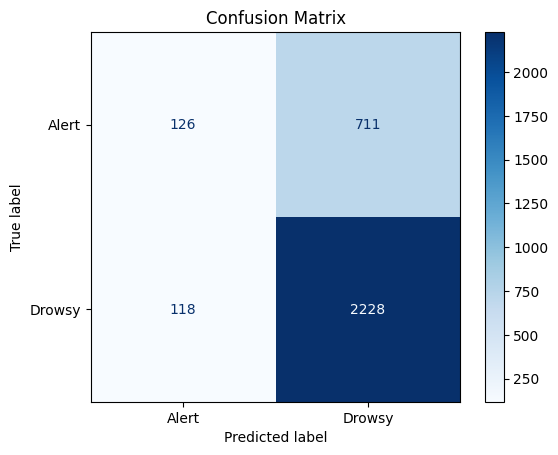

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

       Alert     0.5164    0.1505    0.2331       837
      Drowsy     0.7581    0.9497    0.8431      2346

    accuracy                         0.7396      3183
   macro avg     0.6372    0.5501    0.5381      3183
weighted avg     0.6945    0.7396    0.6827      3183



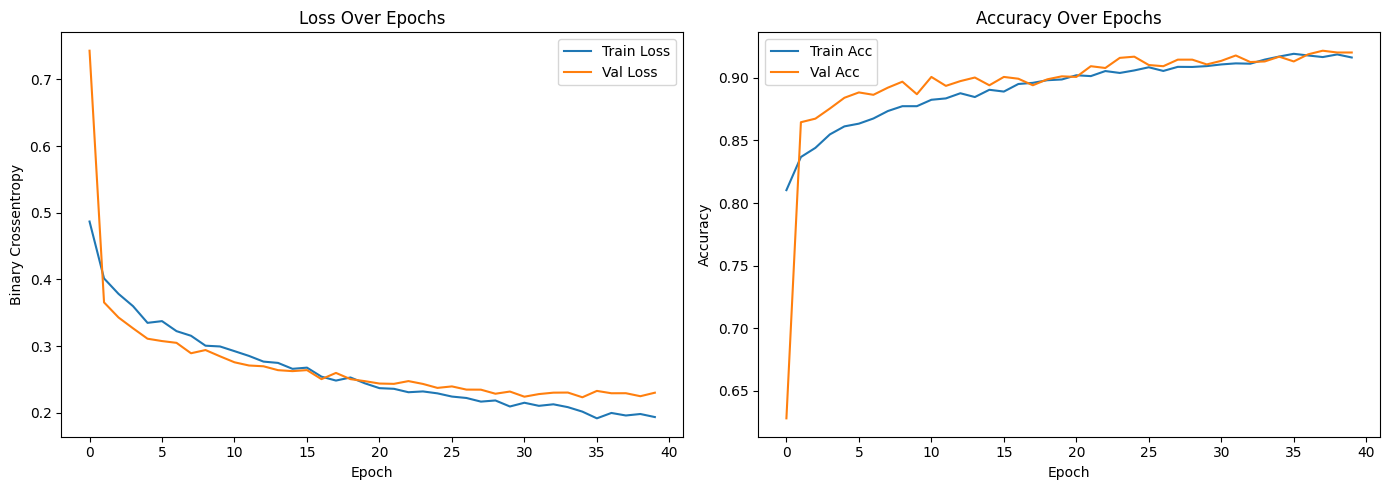

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# -----------------------------
# Load and preprocess data
# -----------------------------
train_path = "Classification_Combined_Data/S1_S2_train_data_10_5s.csv"
test_path  = "Classification_Combined_Data/S1_S2_test_data_10_5s.csv"
df = pd.read_csv(train_path)

# Drop 1back and 2back
df = df[~df['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])

# Binary label
df['binary_label'] = df['Label'].apply(lambda x: 1 if x in ['Slight', 'Moderate', 'Very'] else 0)

# Predictors and label
features = ['EAR_mean_mean','MAR_inner_mean','MAR_outer_mean','AU01_r_mean','AU15_r_mean','AU25_r_mean','AU26_r_mean','AU45_r_mean','pose_Tx_mean','pose_Ty_mean','pose_Tz_mean','pose_Rx_mean','pose_Ry_mean','pose_Rz_mean','gaze_angle_x_mean','gaze_angle_y_mean','swAngle_mean','laneDevPosition_mean','laneDev_OffsetfrmLaneCentre_mean','speed_mean','EAR_mean_std','MAR_inner_std','MAR_outer_std','AU01_r_std','AU15_r_std','AU25_r_std','AU26_r_std','AU45_r_std','pose_Tx_std','pose_Ty_std','pose_Tz_std','pose_Rx_std','pose_Ry_std','pose_Rz_std','gaze_angle_x_std','gaze_angle_y_std','swAngle_std','laneDevPosition_std','laneDev_OffsetfrmLaneCentre_std','speed_std']
# features = [
#     "EAR_mean",
#     "MAR_inner",
#     "MAR_outer",
#     "AU01_r",
#     "AU15_r",
#     "AU25_r",
#     "AU26_r",
#     "AU45_r",
#     "pose_Tx",
#     "pose_Ty",
#     "pose_Tz",
#     "pose_Rx",
#     "pose_Ry",
#     "pose_Rz",
#     "gaze_angle_x",
#     "gaze_angle_y",
#     "swAngle",
#     "laneDevPosition",
#     "laneDev_OffsetfrmLaneCentre",
#     "speed",
# ]

X= df[features]
y = df['binary_label'].values

# Scale and reshape
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_cnn = X_scaled.reshape(-1, X.shape[1], 1)

df_test = pd.read_csv(test_path)
df_test = df_test[~df_test['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])
df_test['binary_label'] = df_test['Label'].apply(lambda x: 1 if x in ['Slight', 'Moderate', 'Very'] else 0)
X_test_raw = df_test[features]
y_test = df_test['binary_label'].values
X_test_scaled = scaler.transform(X_test_raw)
X_test = X_test_scaled.reshape(-1, X_test_raw.shape[1], 1)

# Train/Val/Test Split
X_train, X_val, y_train, y_val = train_test_split(X_cnn, y, test_size=0.15, stratify=y, random_state=42)
X_test, y_test = X_test, y_test
# X_temp, X_test, y_temp, y_test = train_test_split(X_cnn, y, test_size=0.15, stratify=y, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

# -----------------------------
# CNN Model Definition
# -----------------------------
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    BatchNormalization(),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),

    # Only one pooling layer
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# Train Model
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# -----------------------------
# Evaluation and Confusion Matrix
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Alert", "Drowsy"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# Summary Metrics Table (like screenshot)
# -----------------------------
y_proba = model.predict(X_test).reshape(-1)         # probabilities
y_pred_flat = y_pred.reshape(-1)                    # 0/1 preds
y_test_flat = np.array(y_test).reshape(-1)

acc = accuracy_score(y_test_flat, y_pred_flat)
wgt_f1 = f1_score(y_test_flat, y_pred_flat, average="weighted", zero_division=0)
bal_f1 = f1_score(y_test_flat, y_pred_flat, average="macro", zero_division=0)   # "balanced" ≈ macro-F1
wgt_prec = precision_score(y_test_flat, y_pred_flat, average="weighted", zero_division=0)
wgt_rec = recall_score(y_test_flat, y_pred_flat, average="weighted", zero_division=0)

# AUC only makes sense if both classes exist in y_test
try:
    auc = roc_auc_score(y_test_flat, y_proba) if len(np.unique(y_test_flat)) == 2 else None
except ValueError:
    auc = None

from sklearn.metrics import classification_report

y_pred_flat = y_pred.reshape(-1)          # (n,)
y_test_flat = np.asarray(y_test).reshape(-1)

print(classification_report(
    y_test_flat,
    y_pred_flat,
    labels=[0, 1],
    target_names=["Alert", "Drowsy"],
    digits=4,
    zero_division=0
))

# -----------------------------
# Training Curves
# -----------------------------
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/50


/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37928/37928 ━━━━━━━━━━━━━━━━━━━━ 38s 968us/step - accuracy: 0.6595 - loss: 0.7501 - val_accuracy: 0.7333 - val_loss: 0.6110
Epoch 2/50
37928/37928 ━━━━━━━━━━━━━━━━━━━━ 36s 952us/step - accuracy: 0.6989 - loss: 0.6744 - val_accuracy: 0.7738 - val_loss: 0.5476
Epoch 3/50
37928/37928 ━━━━━━━━━━━━━━━━━━━━ 36s 952us/step - accuracy: 0.7109 - loss: 0.6523 - val_accuracy: 0.7802 - val_loss: 0.5353
Epoch 4/50
37928/37928 ━━━━━━━━━━━━━━━━━━━━ 36s 946us/step - accuracy: 0.7166 - loss: 0.6402 - val_accuracy: 0.7923 - val_loss: 0.5202
Epoch 5/50
37928/37928 ━━━━━━━━━━━━━━━━━━━━ 36s 949us/step - accuracy: 0.7205 - loss: 0.6333 - val_accuracy: 0.7927 - val_loss: 0.5163
Epoch 6/50
37928/37928 ━━━━━━━━━━━━━━━━━━━━ 36s 955us/step - accuracy: 0.7246 - loss: 0.6265 - val_accuracy: 0.7975 - val_loss: 0.5095
Epoch 7/50
37928/37928 ━━━━━━━━━━━━━━━━━━━━ 36s 955us/step - accuracy: 0.7260 - loss: 0.6216 - val_accuracy: 0.8000 - val_loss: 0.5066
Epoch 8/50
37928/37928 ━━━━━━━━━━━━━━━━━━━━ 36s 952us/step - accur

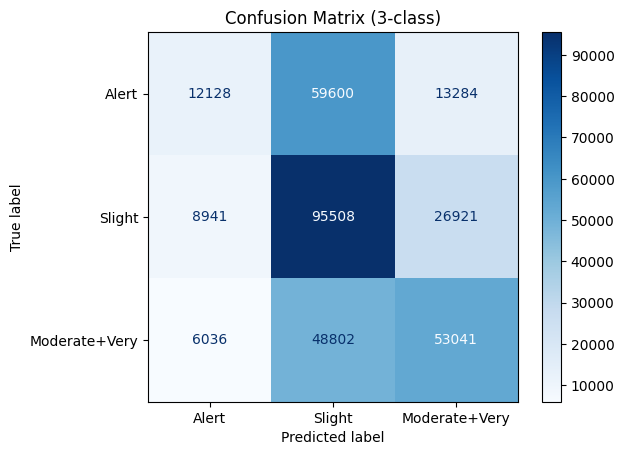

              precision    recall  f1-score   support

       Alert     0.4474    0.1427    0.2163     85012
    Slightly     0.4684    0.7270    0.5697    131370
      Drowsy     0.5688    0.4917    0.5274    107879

    accuracy                         0.4955    324261
   macro avg     0.4949    0.4538    0.4378    324261
weighted avg     0.4963    0.4955    0.4630    324261



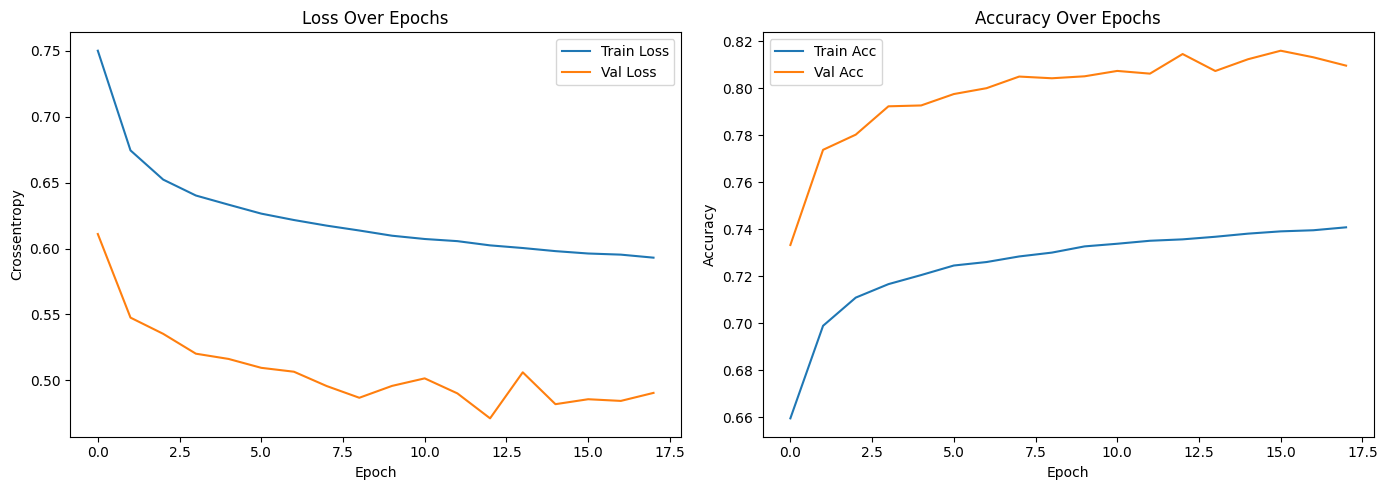

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------
# Load and preprocess data
# -----------------------------
train_path = "Classification_Combined_Data/S1_S2_train_data_60hz.csv"
test_path  = "Classification_Combined_Data/S1_S2_test_data_60hz.csv"

df = pd.read_csv(train_path)

# Drop 1back and 2back + missing labels
df = df[~df['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])

# Multiclass mapping: Not Drowsy vs Slight vs Moderate+Very
label_map = {
    "Not Drowsy": 0,
    "Slight": 1,
    "Moderate": 2,
    "Very": 2
}
df = df[df['Label'].isin(label_map.keys())].copy()
df['y_mc'] = df['Label'].map(label_map).astype(int)

# Predictors and label
# features = [
#     'EAR_mean_mean','MAR_inner_mean','MAR_outer_mean','AU01_r_mean','AU15_r_mean','AU25_r_mean','AU26_r_mean','AU45_r_mean',
#     'pose_Tx_mean','pose_Ty_mean','pose_Tz_mean','pose_Rx_mean','pose_Ry_mean','pose_Rz_mean',
#     'gaze_angle_x_mean','gaze_angle_y_mean','swAngle_mean','laneDevPosition_mean','laneDev_OffsetfrmLaneCentre_mean','speed_mean',
#     'EAR_mean_std','MAR_inner_std','MAR_outer_std','AU01_r_std','AU15_r_std','AU25_r_std','AU26_r_std','AU45_r_std',
#     'pose_Tx_std','pose_Ty_std','pose_Tz_std','pose_Rx_std','pose_Ry_std','pose_Rz_std',
#     'gaze_angle_x_std','gaze_angle_y_std','swAngle_std','laneDevPosition_std','laneDev_OffsetfrmLaneCentre_std','speed_std'
# ]

features = [
    "EAR_mean",
    "MAR_inner",
    "MAR_outer",
    "AU01_r",
    "AU15_r",
    "AU25_r",
    "AU26_r",
    "AU45_r",
    "pose_Tx",
    "pose_Ty",
    "pose_Tz",
    "pose_Rx",
    "pose_Ry",
    "pose_Rz",
    "gaze_angle_x",
    "gaze_angle_y",
    "swAngle",
    "laneDevPosition",
    "laneDev_OffsetfrmLaneCentre",
    "speed",
]

X = df[features]
y = df['y_mc'].values

# Scale and reshape
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_cnn = X_scaled.reshape(-1, X.shape[1], 1)

# -----------------------------
# Load test data (same preprocessing)
# -----------------------------
df_test = pd.read_csv(test_path)
df_test = df_test[~df_test['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])
df_test = df_test[df_test['Label'].isin(label_map.keys())].copy()
df_test['y_mc'] = df_test['Label'].map(label_map).astype(int)

X_test_raw = df_test[features]
y_test = df_test['y_mc'].values
X_test_scaled = scaler.transform(X_test_raw)
X_test = X_test_scaled.reshape(-1, X_test_raw.shape[1], 1)

# Train/Val split (use stratify for multiclass)
X_train, X_val, y_train, y_val = train_test_split(
    X_cnn, y, test_size=0.15, stratify=y, random_state=42
)

# -----------------------------
# CNN Model (multiclass)
# -----------------------------
num_classes = 3

model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    BatchNormalization(),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),

    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

# IMPORTANT: sparse_categorical_crossentropy expects integer labels 0..K-1
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# Train
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# -----------------------------
# Evaluate + confusion matrix
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

probs = model.predict(X_test, verbose=0)               # shape (N, 3)
y_pred = np.argmax(probs, axis=1)

labels = ["Alert", "Slight", "Moderate+Very"]
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix (3-class)")
plt.show()

# -----------------------------
# Summary Metrics Table (multiclass, like screenshot)
# -----------------------------
acc = accuracy_score(y_test, y_pred)
wgt_f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
bal_f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)  # macro-F1

wgt_prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
wgt_rec  = recall_score(y_test, y_pred, average="weighted", zero_division=0)

# Multiclass AUC (one-vs-rest) if all classes appear in y_test
try:
    auc = roc_auc_score(y_test, probs, multi_class="ovr", average="weighted") if len(np.unique(y_test)) == num_classes else None
except ValueError:
    auc = None

from sklearn.metrics import classification_report

y_pred_flat = y_pred.reshape(-1)          # (n,)
y_test_flat = np.asarray(y_test).reshape(-1)

print(classification_report(
    y_test_flat,
    y_pred_flat,
    labels=[0, 1, 2],
    target_names=["Alert", "Slightly", "Drowsy"],
    digits=4,
    zero_division=0
))

# -----------------------------
# Training curves
# -----------------------------
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Crossentropy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
import os
import pandas as pd

# Paths
data_dir = 'Classification_Combined_Data/Combined_S1S2_clean'
os.makedirs('Classification_Combined_Data', exist_ok=True)

# Train/test splits
# train_ids = ['S1_P13', 'S1_P04', 'S1_P27', 'S2_P24', 'S1_P18', 'S2_P45', 'S1_P23', 'S2_P15', 'S1_P11', 'S1_P29', 
#              'S2_P30', 'S2_P35', 'S1_P33', 'S2_P29', 'S1_P21', 'S1_P20', 'S2_P04', 'S1_P16', 'S2_P17', 'S2_P19',
#              'S1_P34', 'S2_P44', 'S1_P12', 'S2_P27', 'S1_P08', 'S1_P03', 'S1_P14', 'S2_P42', 'S2_P31', 'S2_P21',
#              'S1_P32', 'S2_P18', 'S2_P46', 'S2_P37', 'S2_P28', 'S2_P36', 'S2_P38', 'S1_P24', 'S2_P32', 'S1_P26',
#              'S1_P28', 'S2_P26', 'S2_P33', 'S2_P23', 'S2_P43', 'S2_P34', 'S1_P07', 'S1_P05', 'S1_P17', 'S1_P09',
#              'S2_P09']

# test_ids = ['S2_P12', 'S1_P15', 'S1_P31', 'S2_P22', 'S1_P19', 'S2_P39', 'S2_P48', 'S1_P35', 'S2_P40', 'S2_P41',
#             'S2_P49', 'S1_P10', 'S2_P13']

train_ids= ['S1_P13', 'S1_P04', 'S1_P27', 'S2_P24', 'S1_P18', 'S2_P45', 'S1_P23',
'S2_P15', 'S1_P11', 'S1_P29', 'S2_P30', 'S2_P35', 'S1_P33', 'S2_P29', 'S1_P21', 'S1_P20',
#'S2_P04', #labels missing
'S1_P16', 'S2_P17', 'S2_P19', 'S1_P34', 'S2_P44', 'S1_P12', 'S2_P27', 'S1_P08', 'S1_P03',
'S1_P14', 'S2_P42', 'S2_P31', 'S2_P21', 'S1_P32', 'S2_P18', 'S2_P46', 'S2_P37',
'S2_P28', 'S2_P36', 'S2_P38', 'S1_P24', 'S2_P32', 'S1_P26', 'S1_P28', 'S2_P26', 'S2_P33', #'S2_P23', #labels missing
'S2_P43', 'S2_P34', 'S1_P07', 'S1_P05', 'S1_P17', 'S1_P09', 'S2_P09']
 
test_ids = ['S2_P12', 'S1_P15', 'S1_P31',
#'S2_P22', ## labels missing
'S1_P19', 'S2_P39', 'S2_P48', 'S1_P35', 'S2_P40',
'S2_P41', 'S2_P49', 'S1_P10', 'S2_P13']

# Features setup
selected_features = [
    'ID','Label_unify','UNIX',  # no 'Study' column in data
    'EAR_mean', 'MAR_inner', 'MAR_outer',
    'AU01_r', 'AU15_r', 'AU25_r', 'AU26_r', 'AU45_r',
    'pose_Tx', 'pose_Ty', 'pose_Tz',
    'pose_Rx', 'pose_Ry', 'pose_Rz',
    'gaze_angle_x', 'gaze_angle_y',
    'swAngle', 'laneDevPosition', 'laneDev_OffsetfrmLaneCentre', 'speed'
]
exclude_features = {'ID', 'UNIX', 'Label_unify'}

def process_file(file_path, file_id):
    df = pd.read_csv(file_path)

    print(f"\n🔍 Processing: {file_id}")

    # Step 1: Select usable features
    available_features = [col for col in selected_features if col in df.columns]
    df = df[available_features]
    print(f"✅ Available features: {available_features}")
    print(f"🧮 Rows after filter: {df.shape[0]}")

    if df.empty:
        return []

    # Step 2: Overlapping 30s windows with 15s stride
    results = []
    stride = 3
    window_size = 15
    start_time = df['UNIX'].min()
    end_time = df['UNIX'].max()
    current_start = start_time

    while current_start + window_size <= end_time:
        window_end = current_start + window_size
        group = df[(df['UNIX'] >= current_start) & (df['UNIX'] < window_end)]

        if group.shape[0] < 150:
            current_start += stride
            continue

        # Get label only if the window has a single consistent label
        if 'Label_unify' in group and group['Label_unify'].notna().any():
            unique_labels = group['Label_unify'].dropna().unique()
            if len(unique_labels) == 1:
                label = unique_labels[0]  # all rows share the same label
            else:
                current_start += stride  # skip this window entirely
                continue
        else:
            current_start += stride
            continue

        # Extract Study from file_id prefix (S1 or S2)
        study = file_id.split('_')[0]
        pid = group['ID'].iloc[0] if 'ID' in group and not group['ID'].isna().all() else None

        # Feature aggregation
        features = [col for col in group.columns if col not in exclude_features]
        means = group[features].mean().add_suffix('_mean').to_frame().T
        stds = group[features].std().add_suffix('_std').to_frame().T

        meta = pd.DataFrame({
            'window_start': [current_start],
            'ID': [pid],
            'Study': [study],
            'Label': [label]
        })

        row = pd.concat([meta.reset_index(drop=True), means.reset_index(drop=True), stds.reset_index(drop=True)], axis=1)
        results.append(row)

        current_start += stride

    print(f"🪟 Valid windows: {len(results)}")
    return results

# Master processing
train_df_list = []
test_df_list = []

for file in os.listdir(data_dir):
    if not file.endswith(".csv"):
        continue

    file_id = file.replace(".csv", "")
    file_path = os.path.join(data_dir, file)
    window_dfs = process_file(file_path, file_id)

    for row_df in window_dfs:
        if file_id in train_ids:
            train_df_list.append(row_df)
        elif file_id in test_ids:
            test_df_list.append(row_df)

# Final merge
train_df = pd.concat(train_df_list, ignore_index=True)
test_df = pd.concat(test_df_list, ignore_index=True)

# Final info
print(f"\n✅ Final TRAIN shape: {train_df.shape}")
print(f"✅ Final TEST shape: {test_df.shape}")
print("📊 Train columns:", train_df.columns.tolist())

# Save output
train_df.to_csv('Classification_Combined_Data/S1_S2_train_data_15s.csv', index=False)
test_df.to_csv('Classification_Combined_Data/S1_S2_test_data_15s.csv', index=False)


🔍 Processing: S1_P05
✅ Available features: ['ID', 'Label_unify', 'UNIX', 'EAR_mean', 'MAR_inner', 'MAR_outer', 'AU01_r', 'AU15_r', 'AU25_r', 'AU26_r', 'AU45_r', 'pose_Tx', 'pose_Ty', 'pose_Tz', 'pose_Rx', 'pose_Ry', 'pose_Rz', 'gaze_angle_x', 'gaze_angle_y', 'swAngle', 'laneDevPosition', 'laneDev_OffsetfrmLaneCentre', 'speed']
🧮 Rows after filter: 59739
🪟 Valid windows: 1940

🔍 Processing: S1_P11
✅ Available features: ['ID', 'Label_unify', 'UNIX', 'EAR_mean', 'MAR_inner', 'MAR_outer', 'AU01_r', 'AU15_r', 'AU25_r', 'AU26_r', 'AU45_r', 'pose_Tx', 'pose_Ty', 'pose_Tz', 'pose_Rx', 'pose_Ry', 'pose_Rz', 'gaze_angle_x', 'gaze_angle_y', 'swAngle', 'laneDevPosition', 'laneDev_OffsetfrmLaneCentre', 'speed']
🧮 Rows after filter: 48310
🪟 Valid windows: 1582

🔍 Processing: S1_P10
✅ Available features: ['ID', 'Label_unify', 'UNIX', 'EAR_mean', 'MAR_inner', 'MAR_outer', 'AU01_r', 'AU15_r', 'AU25_r', 'AU26_r', 'AU45_r', 'pose_Tx', 'pose_Ty', 'pose_Tz', 'pose_Rx', 'pose_Ry', 'pose_Rz', 'gaze_angle_x'

In [1]:
import os
import pandas as pd

data_dir = "Classification_Combined_Data/Combined_S1S2_clean"
os.makedirs("Classification_Combined_Data", exist_ok=True)

train_ids= ['S1_P13','S1_P04','S1_P27','S2_P24','S1_P18','S2_P45','S1_P23','S2_P15','S1_P11','S1_P29',
            'S2_P30','S2_P35','S1_P33','S2_P29','S1_P21','S1_P20','S1_P16','S2_P17','S2_P19','S1_P34',
            'S2_P44','S1_P12','S2_P27','S1_P08','S1_P03','S1_P14','S2_P42','S2_P31','S2_P21','S1_P32',
            'S2_P18','S2_P46','S2_P37','S2_P28','S2_P36','S2_P38','S1_P24','S2_P32','S1_P26','S1_P28',
            'S2_P26','S2_P33','S2_P43','S2_P34','S1_P07','S1_P05','S1_P17','S1_P09','S2_P09']

test_ids = ['S2_P12','S1_P15','S1_P31','S1_P19','S2_P39','S2_P48','S1_P35','S2_P40','S2_P41','S2_P49','S1_P10','S2_P13']

selected_features = [
    'ID','Label_unify','UNIX',
    'EAR_mean','MAR_inner','MAR_outer',
    'AU01_r','AU15_r','AU25_r','AU26_r','AU45_r',
    'pose_Tx','pose_Ty','pose_Tz',
    'pose_Rx','pose_Ry','pose_Rz',
    'gaze_angle_x','gaze_angle_y',
    'swAngle','laneDevPosition','laneDev_OffsetfrmLaneCentre','speed'
]

def process_file_no_windows(file_path, file_id):
    df = pd.read_csv(file_path)

    # keep only columns that exist
    available = [c for c in selected_features if c in df.columns]
    df = df[available].copy()
    if df.empty:
        return None

    # drop rows with missing label
    if "Label_unify" not in df.columns:
        return None
    df = df[df["Label_unify"].notna()].copy()
    if df.empty:
        return None

    # add Study from filename prefix
    df["Study"] = file_id.split("_")[0]  # S1 or S2

    # standardize label column name to "Label" (matches your downstream code)
    df = df.rename(columns={"Label_unify": "Label"})

    return df

train_parts, test_parts = [], []

for file in os.listdir(data_dir):
    if not file.endswith(".csv"):
        continue

    file_id = file.replace(".csv", "")
    file_path = os.path.join(data_dir, file)

    df_proc = process_file_no_windows(file_path, file_id)
    if df_proc is None:
        continue

    if file_id in train_ids:
        train_parts.append(df_proc)
    elif file_id in test_ids:
        test_parts.append(df_proc)

train_df = pd.concat(train_parts, ignore_index=True) if train_parts else pd.DataFrame()
test_df  = pd.concat(test_parts, ignore_index=True)  if test_parts  else pd.DataFrame()

print(f"✅ Final TRAIN shape: {train_df.shape}")
print(f"✅ Final TEST shape: {test_df.shape}")

train_df.to_csv("Classification_Combined_Data/S1_S2_train_data_60hz.csv", index=False)
test_df.to_csv("Classification_Combined_Data/S1_S2_test_data_60hz.csv", index=False)

✅ Final TRAIN shape: (1427849, 24)
✅ Final TEST shape: (324261, 24)
